In [217]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [218]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium


In [219]:
plt.rcParams['figure.figsize']=20,12

In [220]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [221]:
pwd

'C:\\Users\\ramab\\Documents\\Ramesh\\Datasets\\COVID-19-Time-Series-Forecasting-with-Data-Analysis_Ramesh'

In [9]:

import os
os.chdir("C:/Users/ramab/Documents/Ramesh/Datasets/COVID-19-Time-Series-Forecasting-with-Data-Analysis_Ramesh")


In [222]:
Ramesh=pd.read_excel("covid cases in India.xlsx")

In [223]:
Ramesh.head(5)

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Cured,Death
0,1,Andaman and Nicobar Islands,22,11,0
1,2,Andhra Pradesh,895,141,27
2,3,Arunachal Pradesh,1,1,0
3,4,Assam,36,19,1
4,5,Bihar,153,46,2


In [225]:
Ramesh.drop(['S. No.'],axis=1,inplace=True)

In [226]:
Ramesh.head()

,Name of State / UT,Total Confirmed cases (Indian National),Cured,Death
0,Andaman and Nicobar Islands,22,11,0
1,Andhra Pradesh,895,141,27
2,Arunachal Pradesh,1,1,0
3,Assam,36,19,1
4,Bihar,153,46,2


In [227]:
Ramesh.dtypes

Name of State / UT                         object
Total Confirmed cases (Indian National)     int64
Cured                                       int64
Death                                       int64
dtype: object

In [229]:
Ramesh['Total cases']=Ramesh['Total Confirmed cases (Indian National)']

In [230]:
Ramesh.head()

,Name of State / UT,Total Confirmed cases (Indian National),Cured,Death,Total cases
0,Andaman and Nicobar Islands,22,11,0,22
1,Andhra Pradesh,895,141,27,895
2,Arunachal Pradesh,1,1,0,1
3,Assam,36,19,1,36
4,Bihar,153,46,2,153


In [231]:
Total_cases_in_India=Ramesh['Total cases'].sum()
print('Total cases in India is:',Total_cases_in_India)

Total cases in India is: 23027


In [232]:
Ramesh.dtypes
Ramesh.head(2)

,Name of State / UT,Total Confirmed cases (Indian National),Cured,Death,Total cases
0,Andaman and Nicobar Islands,22,11,0,22
1,Andhra Pradesh,895,141,27,895


In [233]:
Ramesh['Active Cases']=Ramesh['Total cases']-(Ramesh['Death']+Ramesh['Cured'])

In [234]:
Ramesh.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Cured,Death,Total cases,Active Cases
0,Andaman and Nicobar Islands,22,11,0,22,11
1,Andhra Pradesh,895,141,27,895,727
2,Arunachal Pradesh,1,1,0,1,0
3,Assam,36,19,1,36,16
4,Bihar,153,46,2,153,105
5,Chandigarh,27,14,0,27,13
6,Chhattisgarh,36,28,0,36,8
7,Delhi,2376,808,50,2376,1518
8,Goa,7,7,0,7,0
9,Gujarat,2624,258,112,2624,2254


In [235]:
Ramesh.dtypes

Name of State / UT                         object
Total Confirmed cases (Indian National)     int64
Cured                                       int64
Death                                       int64
Total cases                                 int64
Active Cases                                int64
dtype: object

In [236]:
Total_Active_Cases=Ramesh.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()

In [237]:
Total_Active_Cases.head(5)

,Active Cases
Name of State / UT,
Maharashtra,5307
Gujarat,2254
Rajasthan,1707
Delhi,1518
Madhya Pradesh,1413


In [61]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [ ]:
#Graphical Representation

In [238]:
Ramesh.dtypes

Name of State / UT                         object
Total Confirmed cases (Indian National)     int64
Cured                                       int64
Death                                       int64
Total cases                                 int64
Active Cases                                int64
dtype: object

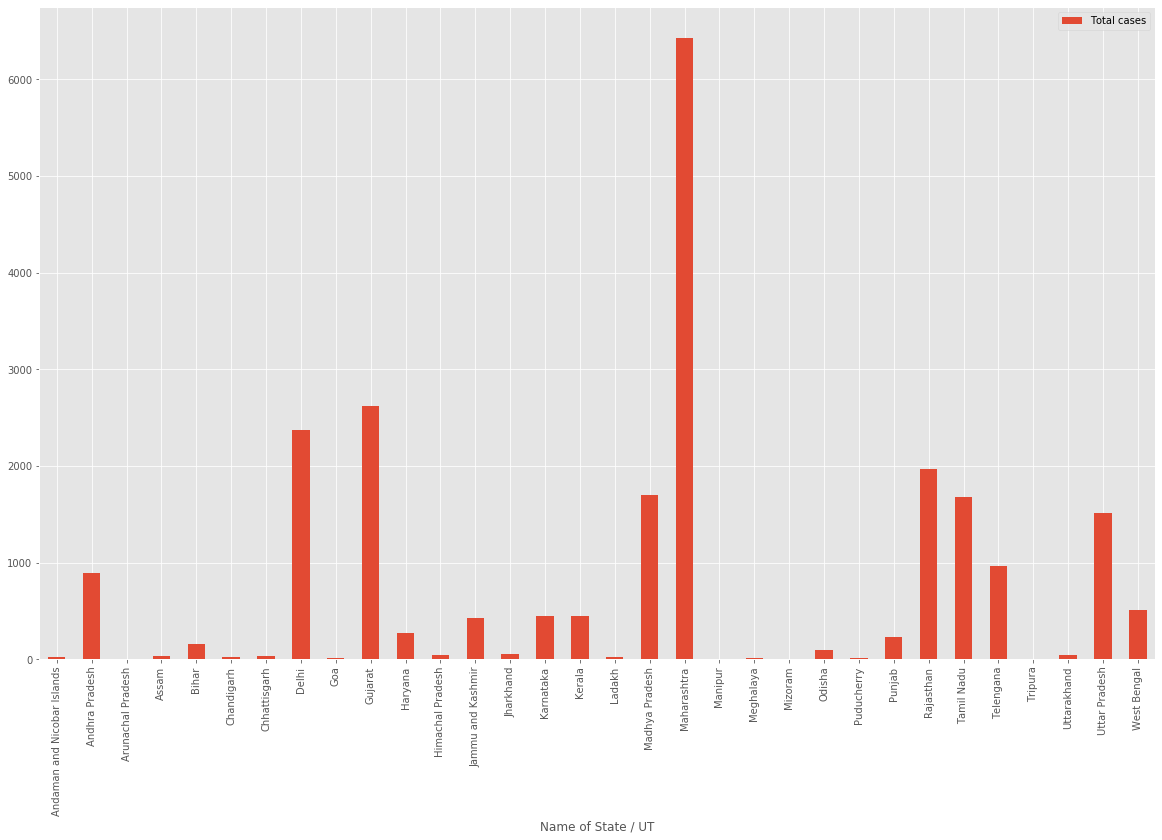

In [239]:
#Through Pandas
Ramesh.plot(kind='bar',x='Name of State / UT',y='Total cases')
plt.show()

#Through plotly
Ramesh.iplot(kind='bar',x='Name of State / UT',y='Total cases') 
## It is very useful when compared with pandas plot.

<BarContainer object of 26 artists>

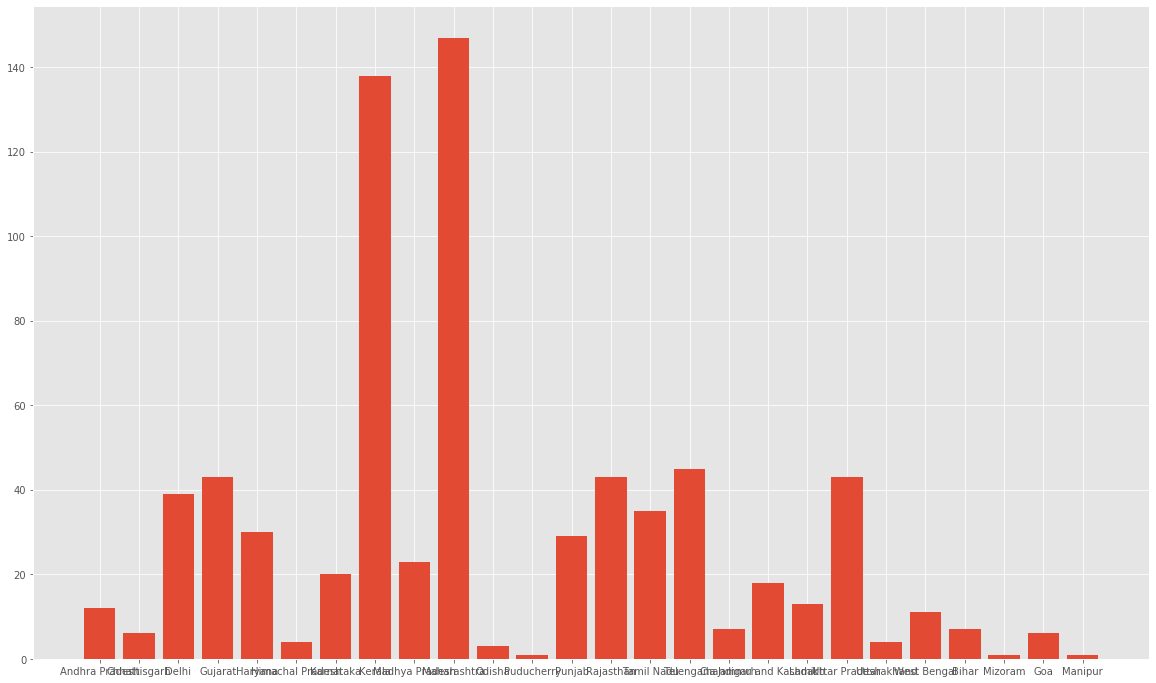

In [67]:
#Matplotlib Vis

plt.bar(Ramesh['Name of State / UT'],Ramesh['Total cases'])

In [240]:
px.bar(Ramesh,x='Name of State / UT',y='Total cases')

In [241]:
Ramesh.dtypes

Name of State / UT                         object
Total Confirmed cases (Indian National)     int64
Cured                                       int64
Death                                       int64
Total cases                                 int64
Active Cases                                int64
dtype: object

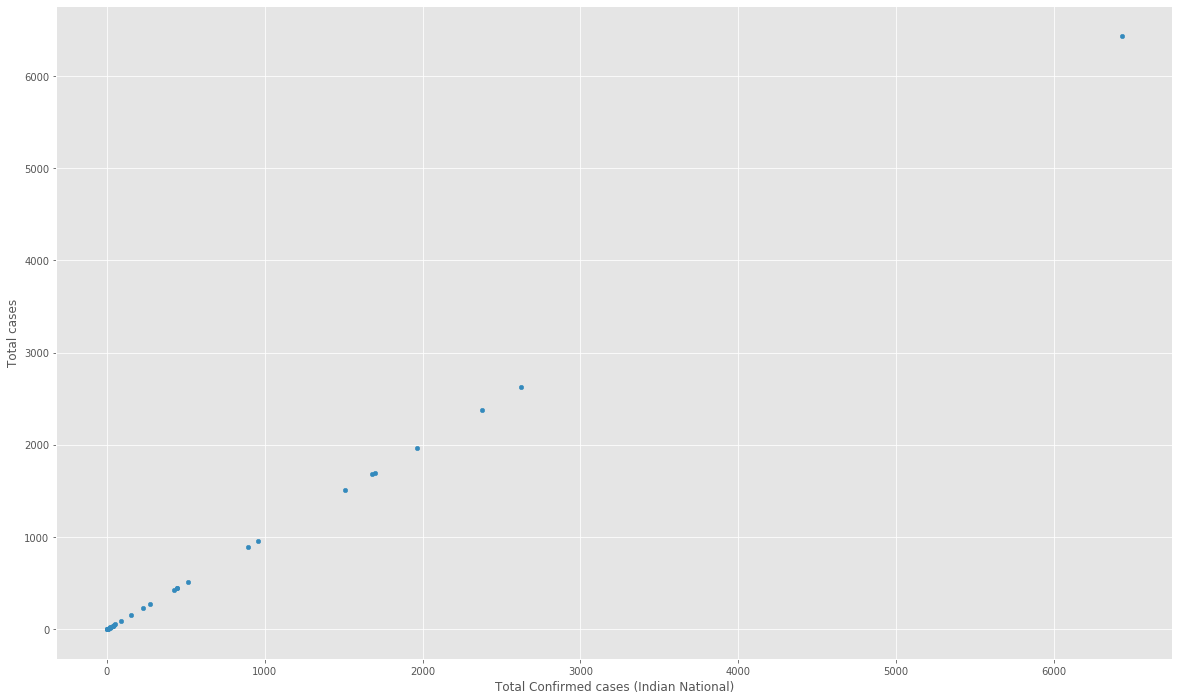

In [242]:
### It is showing me an error because in X the numeric will be allowed in Pandas
Ramesh.plot(kind='scatter',x='Total Confirmed cases (Indian National)',y='Total cases')

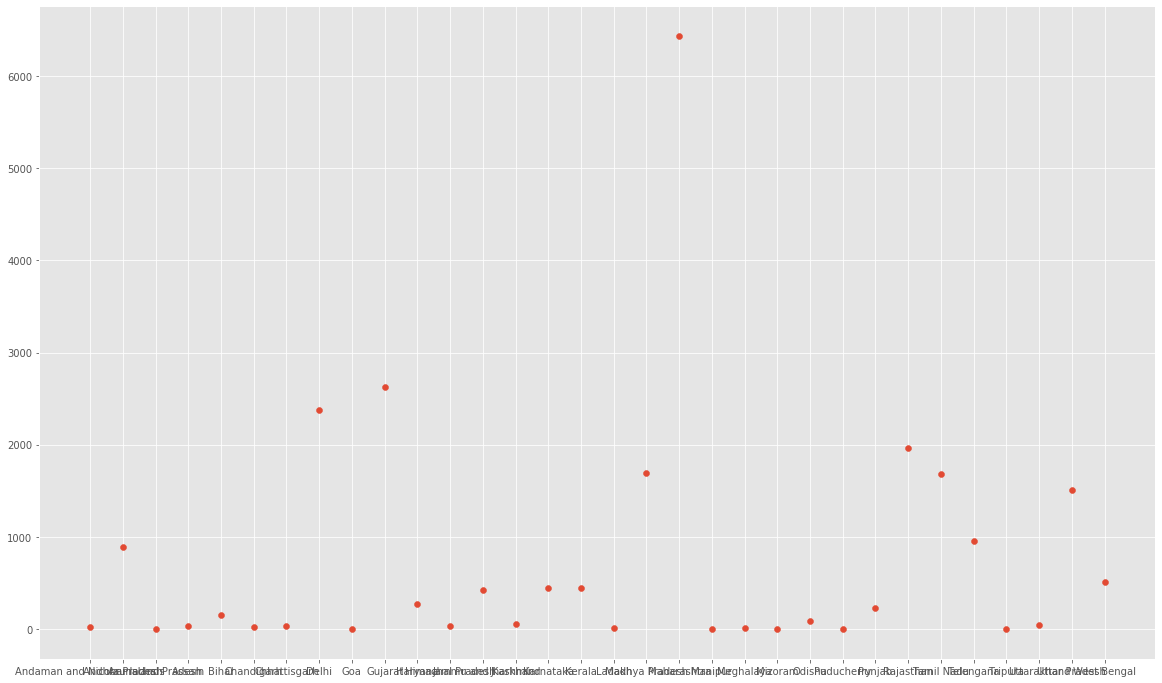

In [244]:
plt.scatter(Ramesh['Name of State / UT'],Ramesh['Total cases'])

In [245]:
Ramesh.iplot(kind='scatter',x='Name of State / UT',y='Total cases',mode='markers+lines')

In [246]:
India_corr=pd.read_excel('Indian Coordinates.xlsx')

In [247]:
India_corr.head(2)

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026


In [250]:
df_full=pd.merge(India_corr,Ramesh,on='Name of State / UT')

In [251]:
Ramesh_full.head(2)

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32


In [269]:
map=folium.Map(location=[20,80],zoom_start=4, tiles='stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.005, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.05).add_to(map)
map

In [101]:
pwd

'C:\\Users\\ramab\\Documents\\Ramesh\\Datasets\\COVID-19-Time-Series-Forecasting-with-Data-Analysis_Ramesh'

In [ ]:
#Now we can see how globally the corono-19 is:

In [274]:
dbd_India=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='India')
dbd_Italy=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
dbd_Wuhan=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')
dbd_Korea=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')

In [275]:
dbd_India.head(2)

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1.0,NaN
1,2020-01-31,1,0.0,NaN


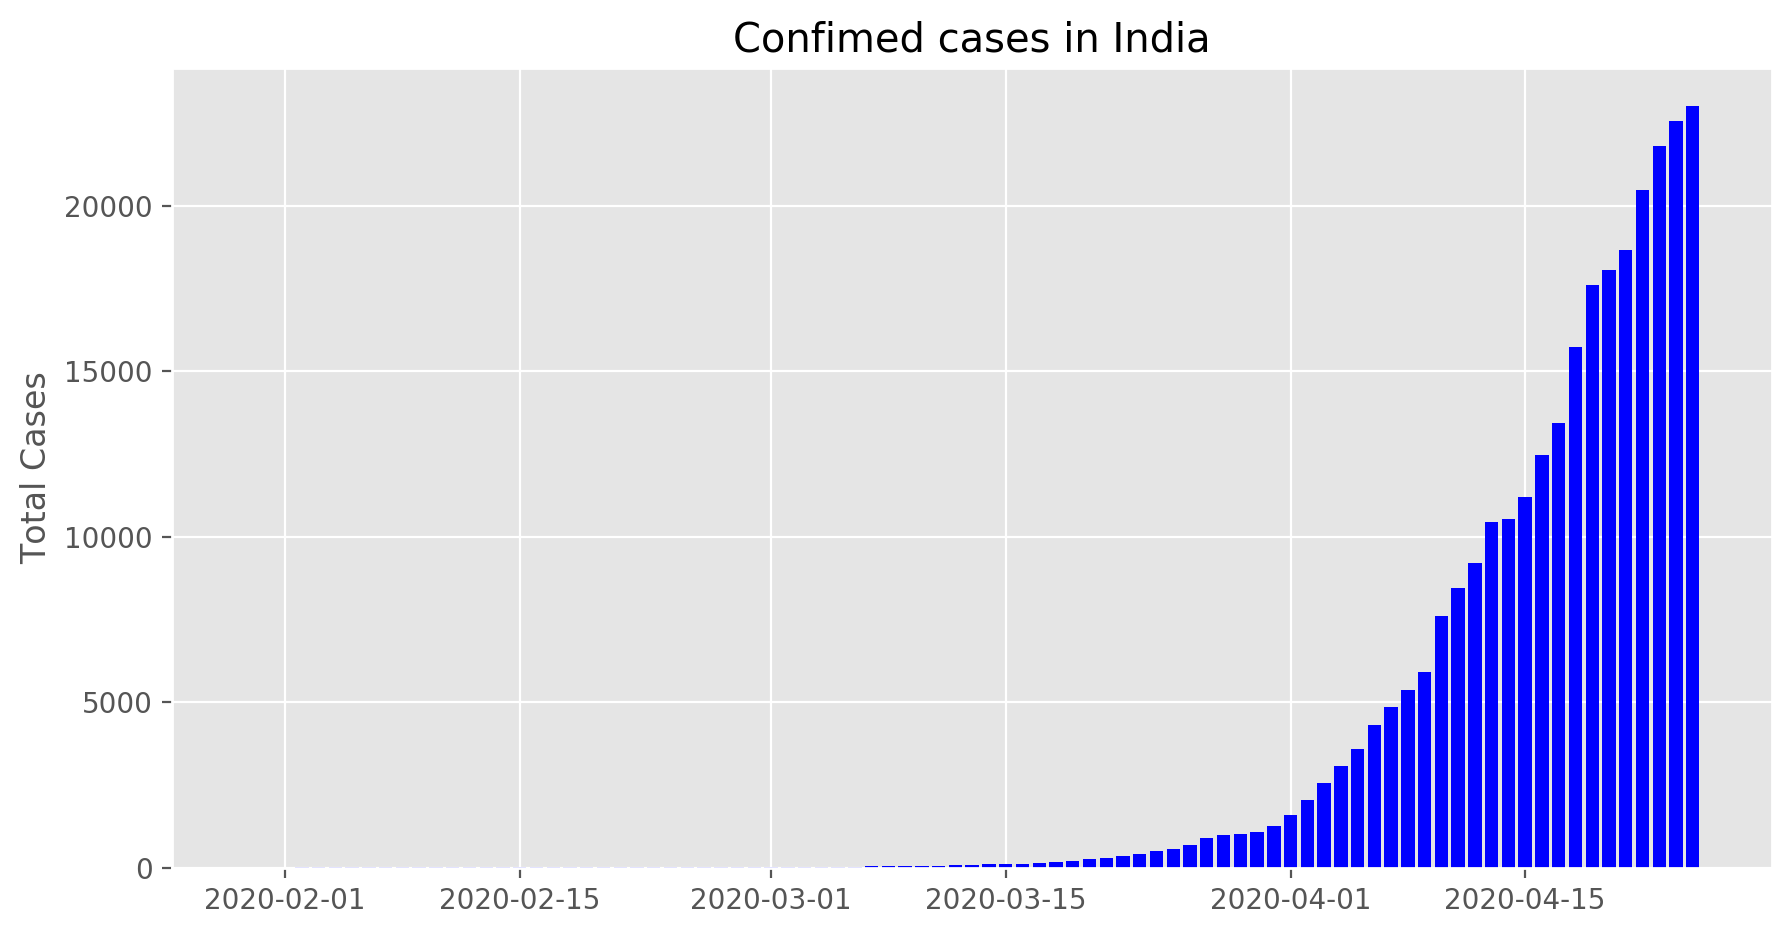

In [276]:
#Matplotlib for BAR plot
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_India['Date'],dbd_India['Total Cases'], color='blue')
axes.set_ylabel('Total Cases')
axes.set_title('Confimed cases in India')
plt.show()    

#Plotly for BAR plot
fig=px.bar(dbd_India,x='Date',y='Total Cases', color='Total Cases',title='Confirmed cases in India')
fig.show()

In [277]:
fig=px.bar(dbd_Italy,x='Date',y='Total Cases', color='Total Cases',title='Confirmed cases in Italy')
fig.show()

fig=px.bar(dbd_Korea,x='Date',y='Total Cases', color='Total Cases',title='Confirmed cases in Korea')
fig.show()

fig=px.bar(dbd_Wuhan,x='Date',y='Total Cases', color='Total Cases',title='Confirmed cases in Wuhan')
fig.show()

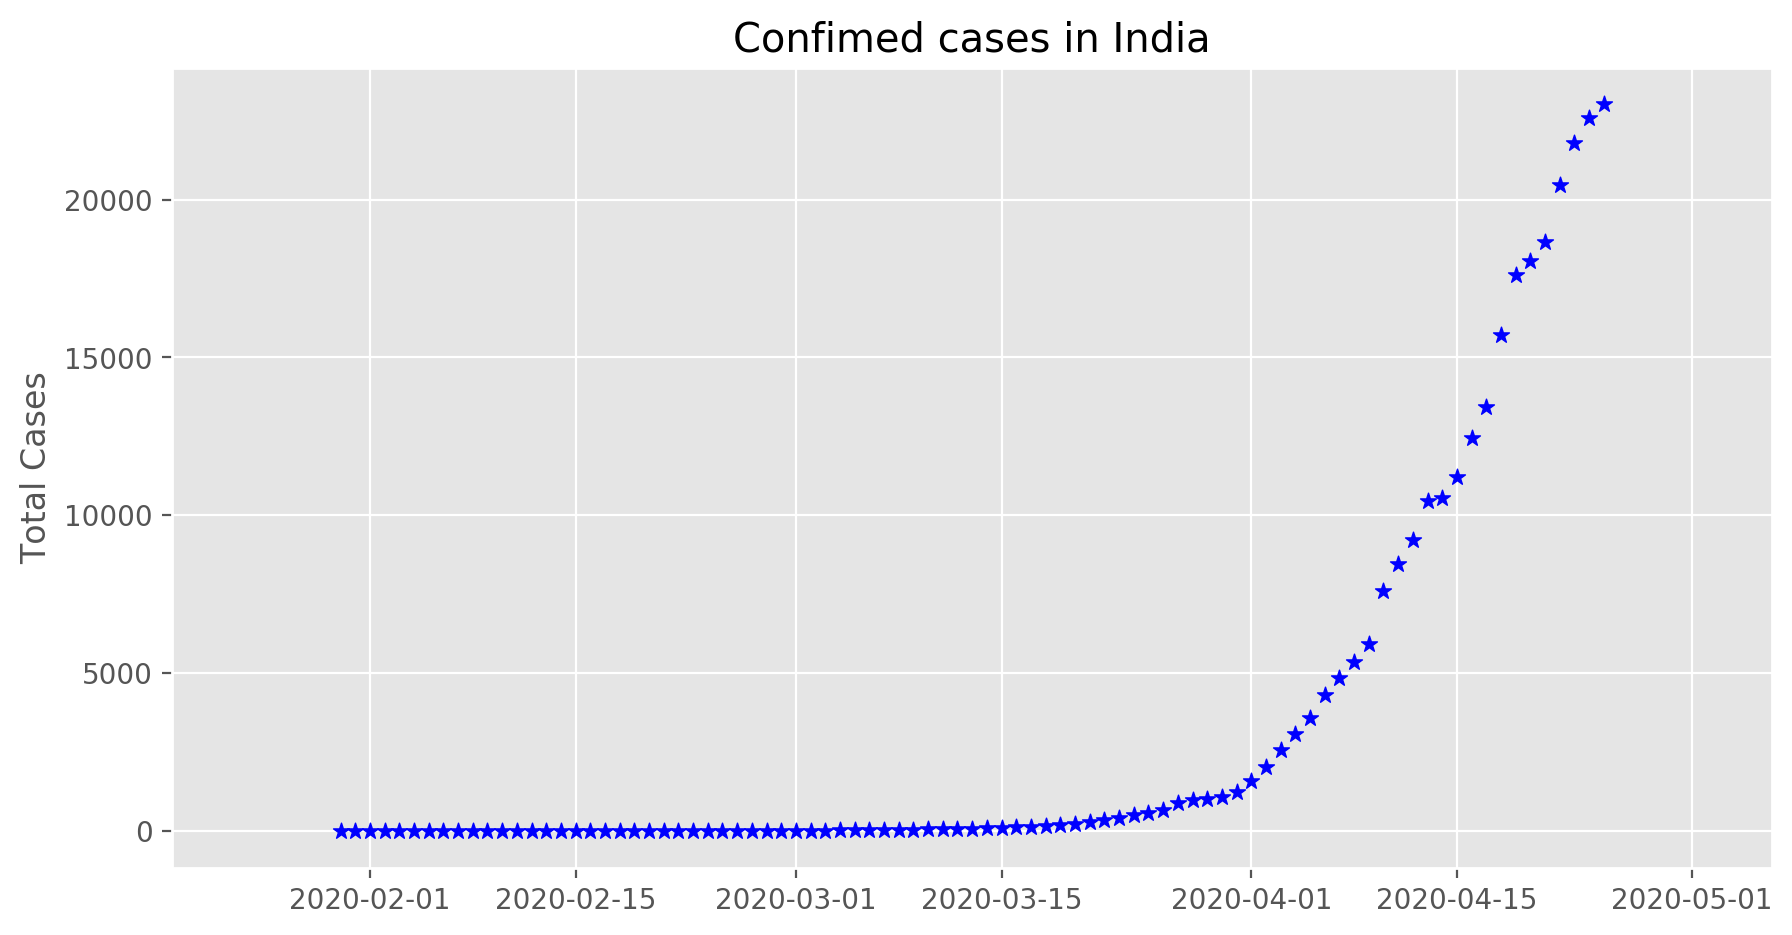

In [278]:
#Matplotlib for Scatter Plot
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(dbd_India['Date'],dbd_India['Total Cases'], color='blue',marker='*')
axes.set_ylabel('Total Cases')
axes.set_title('Confimed cases in India')
plt.show()    

#Plotly for Scatter Plot
fig=px.scatter(dbd_India,x='Date',y='Total Cases', color='Total Cases',title='Confirmed cases in India')
fig.show()

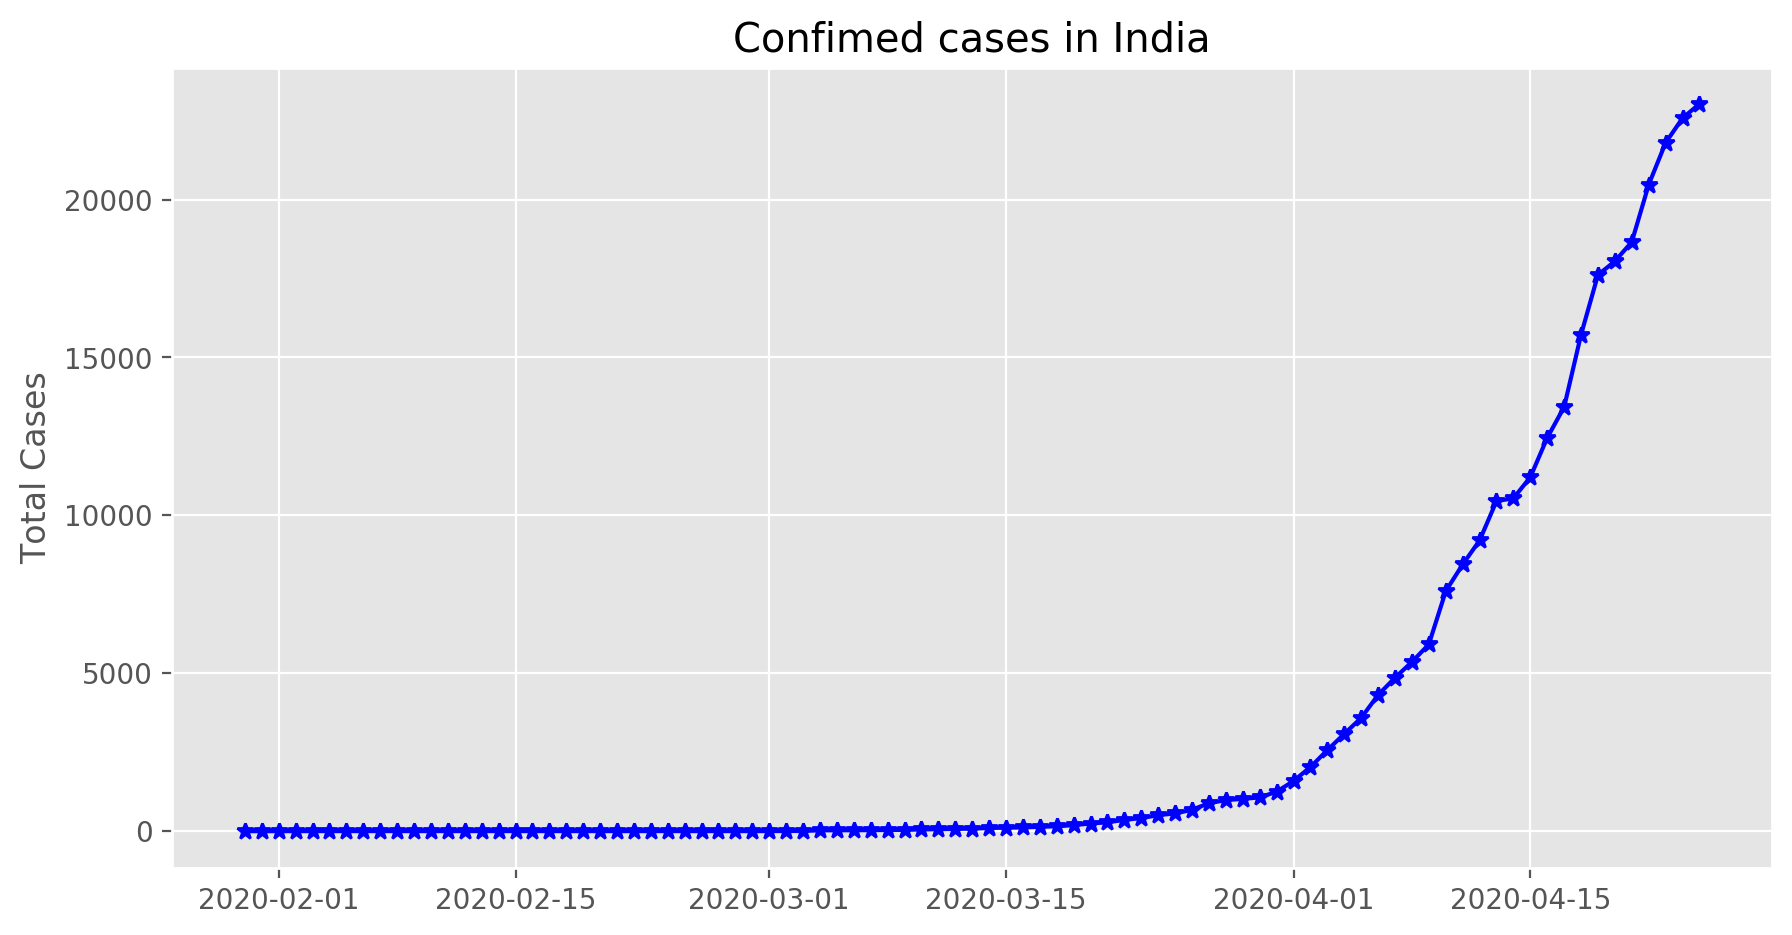

In [279]:
#Matplotlib for Line plot
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(dbd_India['Date'],dbd_India['Total Cases'], color='blue', marker='*')
axes.set_ylabel('Total Cases')
axes.set_title('Confimed cases in India')
plt.show()    

#Plotly
fig=px.scatter(dbd_India,x='Date',y='Total Cases', color='Total Cases',title='Confirmed cases in India')
fig.show()

In [280]:
#Plotly
dbd_India.iplot(kind='scatter',x='Date',y='Total Cases', mode='lines+markers')

In [ ]:
#Subplots using Bar Graph

In [281]:
from plotly.subplots import make_subplots

In [282]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=('Korea','Italy','India','Wuhan'))

fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                     marker=dict(color=dbd_Korea['Total Cases'],coloraxis='coloraxis')),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                     marker=dict(color=dbd_Italy['Total Cases'],coloraxis='coloraxis')),1,2)

fig.add_trace(go.Bar(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                     marker=dict(color=dbd_India['Total Cases'],coloraxis='coloraxis')),2,1)

fig.add_trace(go.Bar(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
                     marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis='coloraxis')),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text='Total cases in 4 countries')

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [285]:
#Scatterplot for 4 countries
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=('Korea','Italy','India','Wuhan'))

fig.add_trace(go.Scatter(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                     marker=dict(color=dbd_Korea['Total Cases'],coloraxis='coloraxis')),1,1)

fig.add_trace(go.Scatter(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                     marker=dict(color=dbd_Italy['Total Cases'],coloraxis='coloraxis')),1,2)

fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                     marker=dict(color=dbd_India['Total Cases'],coloraxis='coloraxis')),2,1)

fig.add_trace(go.Scatter(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
                     marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis='coloraxis')),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text='Total cases in 4 countries')

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [ ]:
#Worl Corono-19 

In [302]:
All_Cases=pd.read_excel('full_data.xlsx',parse_dates=['Last Update'])

In [303]:
All_Cases.drop('S.NO',axis=1,inplace=True)

In [310]:
All_Cases.dropna()

,Date,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-04-25,USA,2020-04-25,945249,53243.0,110834.0
1,2020-04-25,Spain,2020-04-25,223759,22902.0,95708.0
2,2020-04-25,Italy,2020-04-25,195351,26384.0,63120.0
3,2020-04-25,France,2020-04-25,161488,22614.0,44594.0
4,2020-04-25,Germany,2020-04-25,155418,5805.0,109800.0
6,2020-04-25,Turkey,2020-04-25,107773,2706.0,25582.0
7,2020-04-25,Iran,2020-04-25,89328,5650.0,68193.0
8,2020-04-25,China,2020-04-25,82816,4632.0,77346.0
9,2020-04-25,Russia,2020-04-25,74588,681.0,6250.0
10,2020-04-25,Brazil,2020-04-25,55224,3762.0,27655.0


In [314]:
All_Cases.isna().sum()

Date             0
Country          0
Last Update      0
Confirmed        0
Deaths         101
Recovered       38
dtype: int64

In [312]:
All_Cases.dtypes

Date           datetime64[ns]
Country                object
Last Update    datetime64[ns]
Confirmed               int64
Deaths                float64
Recovered             float64
dtype: object

In [319]:
All_Cases.Recovered = All_Cases.Recovered.astype('Int64')

In [320]:
All_Cases.Deaths = All_Cases.Deaths.astype('Int64')

In [321]:
All_Cases.head()

,Date,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-04-25,USA,2020-04-25,945249,53243,110834
1,2020-04-25,Spain,2020-04-25,223759,22902,95708
2,2020-04-25,Italy,2020-04-25,195351,26384,63120
3,2020-04-25,France,2020-04-25,161488,22614,44594
4,2020-04-25,Germany,2020-04-25,155418,5805,109800


In [322]:
All_Cases.query('Country=="India"')

,Date,Country,Last Update,Confirmed,Deaths,Recovered
15,2020-04-25,India,2020-04-25,24942,780,5498


In [323]:
#If we want by date
All_Cases.groupby('Date').sum()

,Country,Confirmed,Deaths,Recovered
Date,,,,
2020-04-25,USASpainItalyFranceGermanyUKTurkeyIranChinaRus...,2891073,201187,824245


In [332]:
All_Cases.head()

,Date,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-04-25,USA,2020-04-25,945249,53243,110834
1,2020-04-25,Spain,2020-04-25,223759,22902,95708
2,2020-04-25,Italy,2020-04-25,195351,26384,63120
3,2020-04-25,France,2020-04-25,161488,22614,44594
4,2020-04-25,Germany,2020-04-25,155418,5805,109800


In [333]:
df_Confirmed=pd.read_excel('Lat_Long.xlsx')

In [335]:
df_latlong=pd.merge(All_Cases,df_Confirmed,on=['Country'])

In [338]:
df_latlong.head()

,Date,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,2020-04-25,Spain,2020-04-25,223759,22902,95708,40.25,3.45
1,2020-04-25,Italy,2020-04-25,195351,26384,63120,41.54,12.29
2,2020-04-25,France,2020-04-25,161488,22614,44594,48.50,2.20
3,2020-04-25,Germany,2020-04-25,155418,5805,109800,52.30,13.25
4,2020-04-25,Turkey,2020-04-25,107773,2706,25582,39.57,32.54


In [339]:
df_latlong.drop('Date',axis=1,inplace=True)

In [342]:
fig=px.density_mapbox(df_latlong,lat='Lat',lon='Long',hover_name='Country',hover_data=['Confirmed','Deaths','Recovered'],color_continuous_scale='portland',radius=7,zoom=0,height=700)
fig.update_layout(title='World Corono cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})